<a href="https://colab.research.google.com/github/maxwelmwala0888/self-projects/blob/main/credit_scoring2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Install the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('/content/Dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

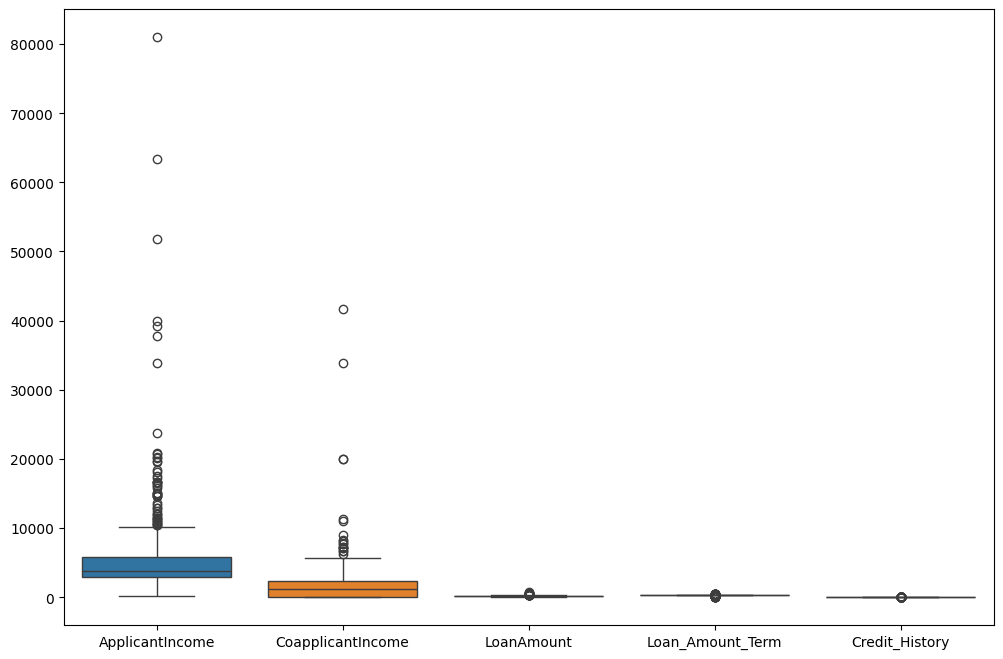

In [10]:
## checking for outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [11]:
## Fill the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [12]:
## Fill the null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [13]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

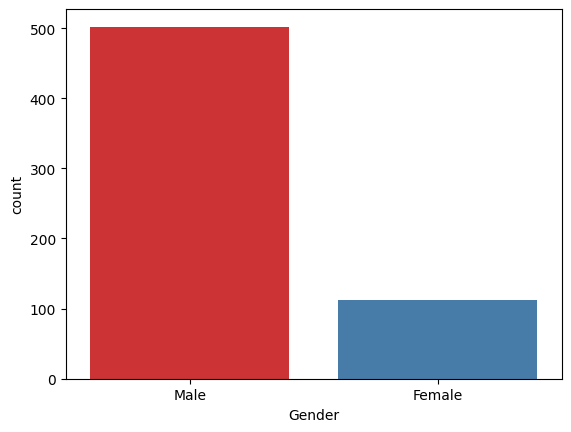

In [14]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')

Number of people who took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

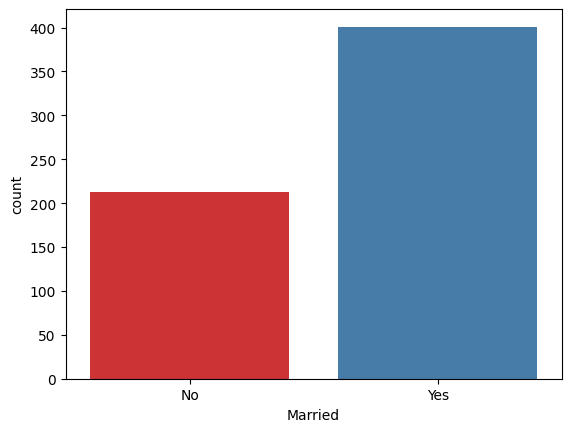

In [15]:
#comparing by marriage
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette='Set1')

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

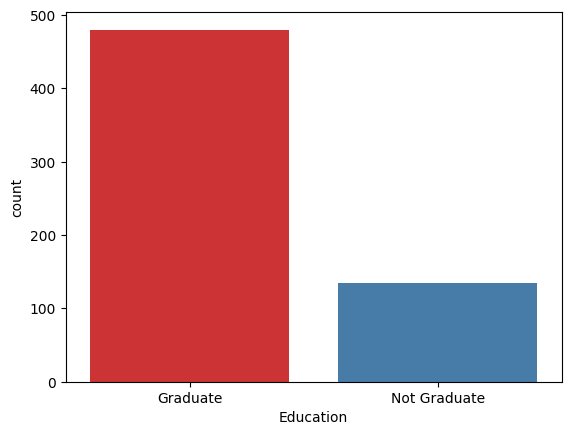

In [16]:
## compairing by education
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set1')

In [22]:
## Encoding Technique : Label Encoding, One Hot Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status','Loan_ID']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

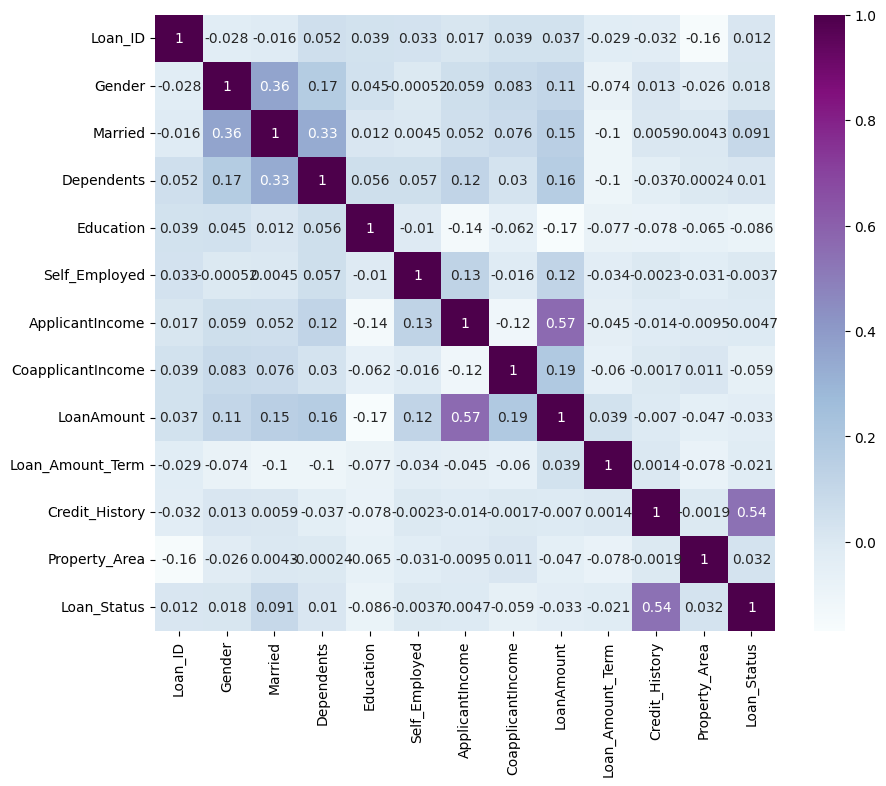

In [24]:
##finding relationships
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [29]:
df2 = df.drop(['Loan_ID'], axis=1)
df2.head()
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


<Axes: >

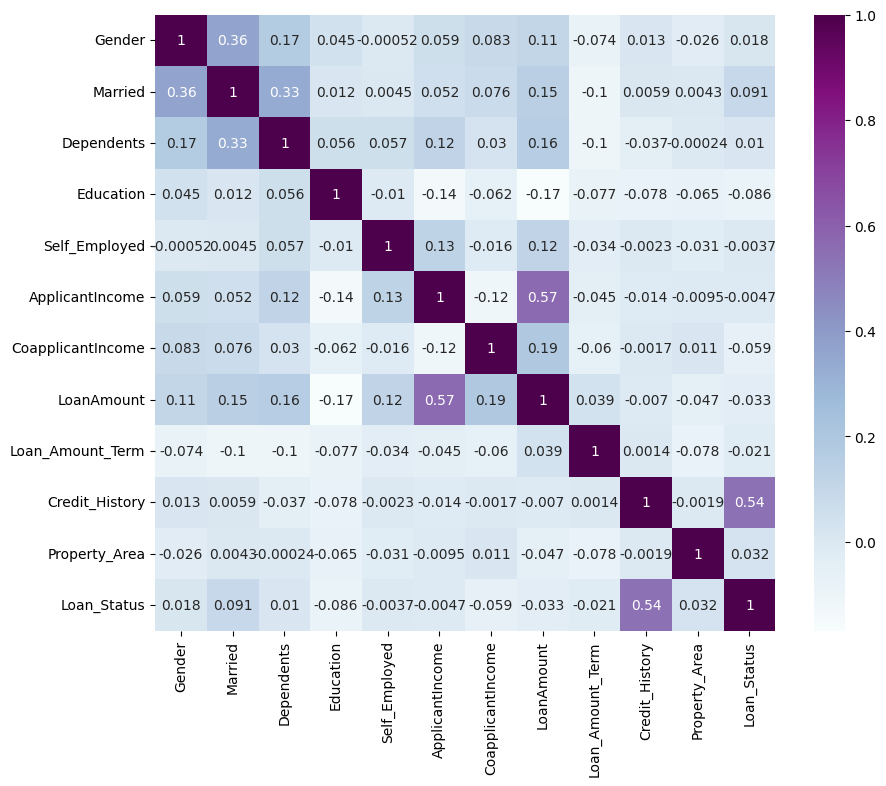

In [30]:
##finding relationships
corr = df2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

In [32]:
corr = df2.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.039235,-0.007031,-0.046632,-0.033214
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.039235,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007031,0.001395,1.000000,-0.001880,0.540483


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

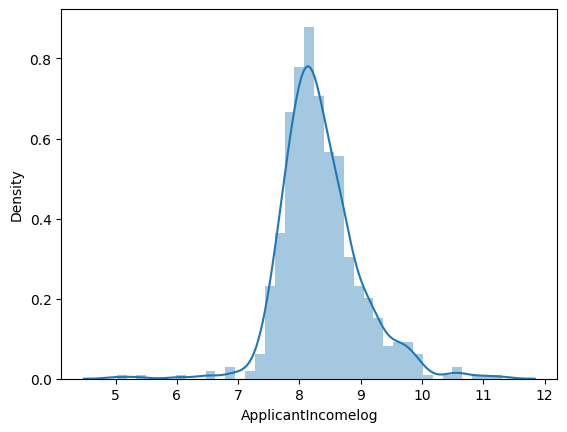

In [38]:
## Apply Log Transformation

df2['ApplicantIncomelog'] = np.log(df2['ApplicantIncome'] + 1)
sns.distplot(df2['ApplicantIncomelog'])

In [39]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,8.674197
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,8.430327
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,8.006701
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,7.857094
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,8.699681


In [44]:
## Total Applicant Income

df2['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,Total_Income
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,8.674197,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,8.430327,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,8.006701,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,7.857094,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,8.699681,6000.0


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

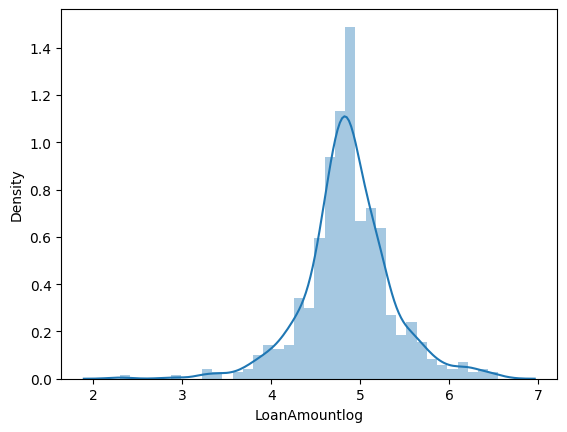

In [45]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

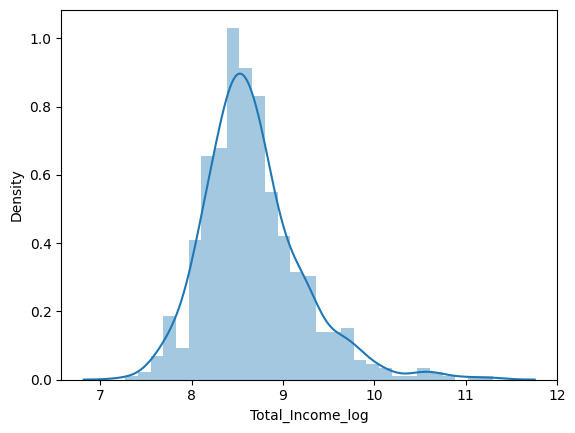

In [47]:

df2['Total_Income_log'] = np.log(df2['Total_Income'] + 1)
sns.distplot(df2['Total_Income_log'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

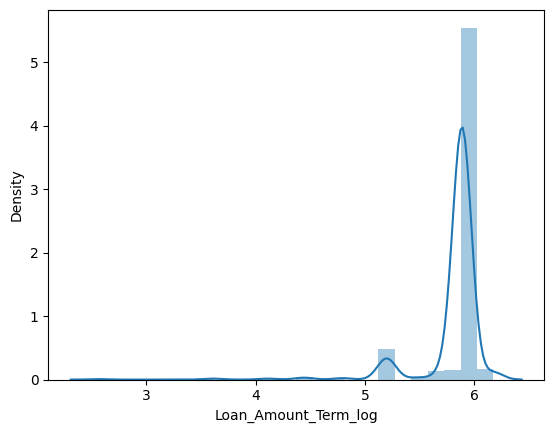

In [57]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'])

In [48]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,Total_Income,Total_Income_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,8.674197,5849.0,8.674197
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,8.430327,6091.0,8.714732
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,8.006701,3000.0,8.006701
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,7.857094,4941.0,8.505525
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,8.699681,6000.0,8.699681


In [51]:
df2.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [52]:
## Split Independent and dependent features

X = df2.drop(columns = ['Loan_Status'],axis = 1)
y = df2['Loan_Status']

In [54]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncomelog,Total_Income,Total_Income_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,8.674197,5849.0,8.674197
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,8.430327,6091.0,8.714732
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,8.006701,3000.0,8.006701
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,7.857094,4941.0,8.505525
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,8.699681,6000.0,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,7.972811,2900.0,7.972811
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,8.320448,4106.0,8.320448
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,8.996280,8312.0,9.025576
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,8.933796,7583.0,8.933796


In [56]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [59]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [60]:
labeled_df, unlabeled_df = train_test_split(df2, test_size=0.7, random_state=42, stratify=df['Loan_Status'])

In [67]:
##spliting into labelled and unlabelled
X_labeled = labeled_df.drop('Loan_Status', axis=1)
y_labeled = labeled_df['Loan_Status']
X_unlabeled = unlabeled_df.drop('Loan_Status', axis=1)

In [68]:
##Train initial model
model_semi = LogisticRegression()
model_semi.fit(X_labeled, y_labeled)

LogisticRegression()

In [69]:
## Predict pseudo-labels for unlabeled data
pseudo_labels = model_semi.predict(X_unlabeled)

In [70]:
## combine lebeled + psedo lebebeled data
X_combined = pd.concat([X_labeled, X_unlabeled])
y_combined = pd.concat([y_labeled, pd.Series(pseudo_labels, index=X_unlabeled.index)])


In [71]:
# Retrain model on combined dataset
final_model = LogisticRegression()
final_model.fit(X_combined, y_combined)

LogisticRegression()

In [73]:
# Final evaluation on the original full dataset
X_full = df.drop('Loan_Status', axis=1)
y_full = df['Loan_Status']
y_pred_final = final_model.predict(X_full)

In [74]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,8.674197,4.859812,5.888878
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,8.430327,4.859812,5.888878
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,8.006701,4.204693,5.888878
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,7.857094,4.795791,5.888878
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,8.699681,4.955827,5.888878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,7.972811,4.276666,5.888878
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,8.320448,3.713572,5.198497
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8.996280,5.537334,5.888878
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,8.933796,5.236442,5.888878


In [76]:
from sklearn.metrics import classification_report

In [77]:
print("\n\n=== Final Evaluation After Semi-Supervised Learning ===")
print("Accuracy:", accuracy_score(y_full, y_pred_final)*100)
print("\nClassification Report:\n", classification_report(y_full, y_pred_final))




=== Final Evaluation After Semi-Supervised Learning ===
Accuracy: 73.28990228013029

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.25      0.37       192
           1       0.74      0.95      0.83       422

    accuracy                           0.73       614
   macro avg       0.72      0.60      0.60       614
weighted avg       0.73      0.73      0.69       614



In [78]:
## Train initial model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
model_semi = RandomForestClassifier(random_state=42)
model_semi.fit(X_labeled, y_labeled)

RandomForestClassifier(random_state=42)

In [80]:
## Predict pseudo-labels for unlabeled data
pseudo_labels = model_semi.predict(X_unlabeled)

In [81]:
## Combine labeled + pseudo-labeled data
X_combined = pd.concat([X_labeled, X_unlabeled])
y_combined = pd.concat([y_labeled, pd.Series(pseudo_labels, index=X_unlabeled.index)])

In [82]:
# Retrain model on combined dataset using Random Forest Classifier
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_combined, y_combined)

RandomForestClassifier(random_state=42)

In [83]:
# Final evaluation on the original full dataset
X_full = df.drop('Loan_Status', axis=1)
y_full = df['Loan_Status']
y_pred_final = final_model.predict(X_full)

In [84]:
# Generate classification report for the final model
from sklearn.metrics import accuracy_score, classification_report

In [85]:
print("\n\n=== Final Evaluation After Semi-Supervised Learning ===")
print("Accuracy:", accuracy_score(y_full, y_pred_final) * 100)
print("\nClassification Report:\n", classification_report(y_full, y_pred_final))



=== Final Evaluation After Semi-Supervised Learning ===
Accuracy: 81.27035830618892

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       192
           1       0.84      0.89      0.87       422

    accuracy                           0.81       614
   macro avg       0.79      0.76      0.77       614
weighted avg       0.81      0.81      0.81       614

